# Exploratory Data Analysis (EDA) of Toyota Stock Dataset  

In this analysis, we will explore the **Toyota Stock Dataset (1980-2024)** sourced from [Kaggle](https://www.kaggle.com/datasets/mhassansaboor/toyota-motors-stock-data-2980-2024). This dataset provides daily stock trading data for **Toyota Motor Corporation (ticker: TM)**, covering over four decades of market activity.  

Our goal is to conduct an **Exploratory Data Analysis (EDA)** to uncover trends, detect potential anomalies, and prepare the data for further financial analysis or predictive modeling.  

We will analyze key stock metrics such as **adjusted closing prices, opening/closing prices, highs, lows, and trading volumes**.

Let's dive into the data and uncover insights into Toyota's historical stock performance! 🚀

## Import Libraries

Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.dates as mdates

## The Data

Let's start by reading in the Toyota_Data.csv file into a pandas dataframe.

In [8]:
df = pd.read_csv("Toyota_Data.csv")

df.head(21)  

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409
5,1980-03-24,2.371490,3.398259,3.451775,3.398259,0.000000,2803
6,1980-03-25,2.352816,3.371501,3.425017,3.371501,0.000000,27095
7,1980-03-26,2.352816,3.371501,3.425017,3.371501,0.000000,1869
8,1980-03-27,2.324807,3.331364,3.384880,3.331364,0.000000,14015
9,1980-03-28,2.315470,3.317985,3.371501,3.317985,0.000000,36438


## Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [3]:
df.isnull()

,Date,Adj Close,Close,High,Low,Open,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
11286,False,False,False,False,False,False,False
11287,False,False,False,False,False,False,False
11288,False,False,False,False,False,False,False
11289,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

Approximately **0%** of the data is missing, indicating a complete dataset with no null values. Since there are no missing values, we don’t need to perform imputation. However, checking the `Volume` column, we notice some values are `0`. This could indicate days with no stock trading activity rather than missing data. We may need to investigate further to determine if these zeros should be treated as valid data points or handled differently.

In [23]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000,1.129100e+04
mean,63.586275,72.057776,72.478879,71.646418,67.955424,2.146604e+05
std,52.272225,51.295776,51.552662,50.976716,55.851523,3.874256e+05
min,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,19.224636,27.548208,27.735613,27.548208,0.000000,1.350000e+04
50%,50.583900,66.040001,66.650002,65.440002,66.000000,9.100000e+04
75%,104.705669,114.295002,114.895000,113.625000,114.294998,2.923000e+05
max,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07


# 📊 Descriptive Statistical Analysis - `df.describe()`

In this section, we performed a descriptive statistical analysis using the `df.describe()` method, which provides a summary of key statistical metrics for the numerical columns in the dataset.

## 🔍 Summary of Results:
- **Count (`count`)**: All columns contain 11,291 records, indicating no missing values.
- **Mean (`mean`)**: Represents the average value of each variable, useful for understanding central tendencies.
- **Standard Deviation (`std`)**: Measures data dispersion relative to the mean. Higher values indicate greater variability.
- **Minimum (`min`) and Maximum (`max`)**: Define the observed value range for each variable.
- **Quartiles (`25%`, `50%`, `75%`)**: Show data distribution percentiles, helping to understand median and spread.

## 📊 Observations:
- The `Open` column has minimum values of `0.000000`, which may indicate missing or inconsistent records.
- The `Volume` column exhibits significant variation, suggesting the presence of outliers or periods of high activity.
- Large differences between the mean and median in some columns may indicate skewed distributions.

To further analyze the dataset, we can explore histograms, boxplots, and compute skewness and kurtosis to better understand data distribution. 🚀

Let's continue on by visualizing some more of the data!

<Figure size 1200x600 with 0 Axes>

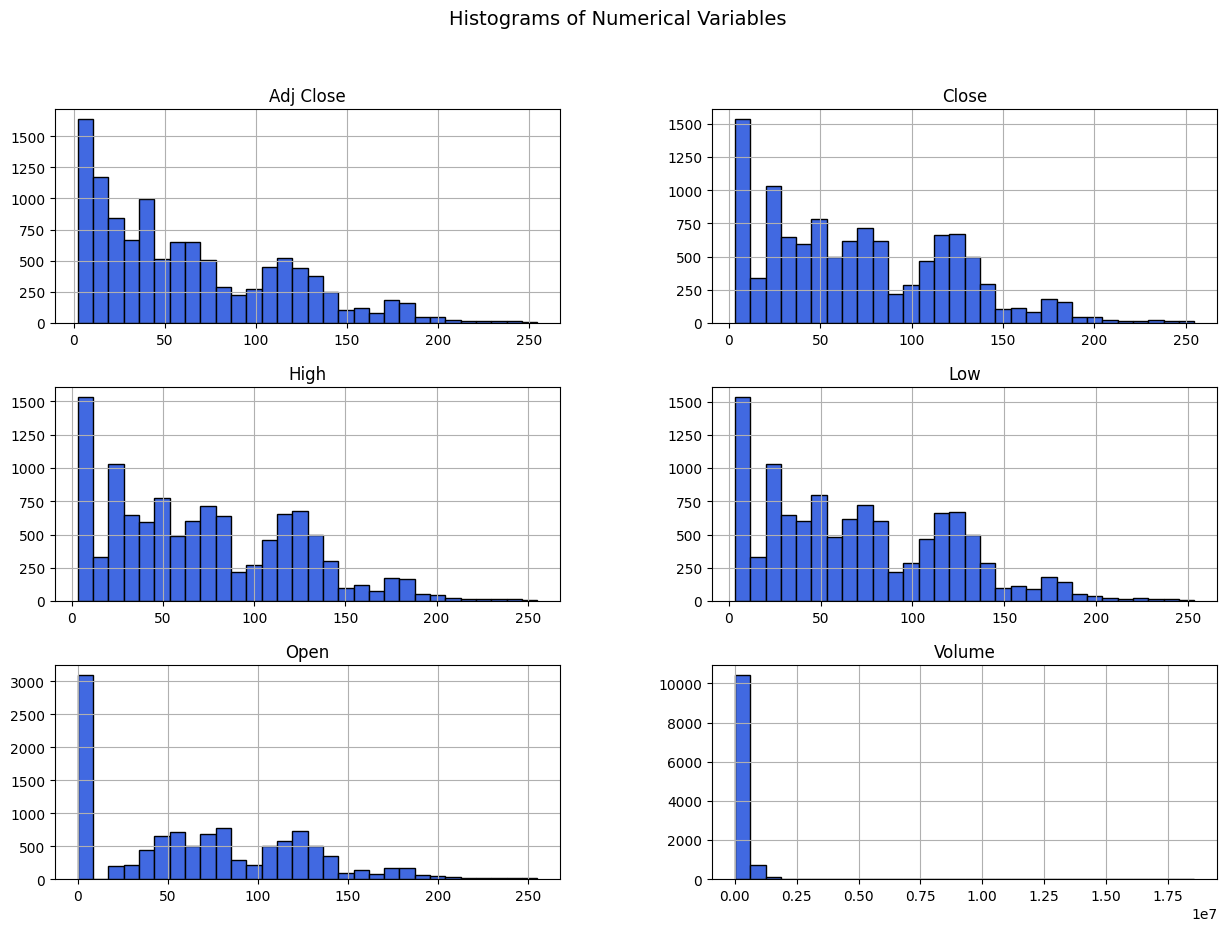

In [24]:
plt.figure(figsize=(12, 6))

df.hist(bins=30, figsize=(15, 10), color='royalblue', edgecolor='black')

plt.suptitle("Histograms of Numerical Variables", fontsize=14)
plt.show()


The histograms provide insights into the distribution of numerical variables in the dataset. Most variables exhibit a right-skewed distribution, indicating that lower values are more frequent, with a few high-value outliers. The `Volume` variable, in particular, shows a significant concentration near zero, suggesting periods of low trading activity. Meanwhile, `Open`, `Close`, `High`, and `Low` prices follow a similar pattern, highlighting possible volatility in stock prices. These distributions suggest potential data transformations, such as log scaling, to better visualize trends and reduce skewness.